# MTH793P - Coursework 10

This is a template notebook for the computational exercises of Coursework 10 of the module MTH793P, Advanced machine learning. The goal of this coursework is to construct and test an autoencoder.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from numpy.testing import assert_almost_equal

## Linear Autoencoder

Your first task is to implement a linear autoencoder, using the **nn.Module** class.<br>
The **<font color='red'>LinearAE</font>** class consturction receives two values:
* **<font color='red'>d_in</font>** - the input dimension.
* **<font color='red'>d_enc</font>** - the dimension of the encoding.

Each encoder should save two inner members:
* **<font color='red'>self.encoder</font>** - an object of type **nn.Linear** implementing the encoding network.
* **<font color='red'>self.decoder</font>** - an object of type **nn.Linear** implementing the decoding network.

You only need to implement the follwing two functions:
* **<font color='red'>init</font>** - creates the encoder/decoder networks, using the input variables **d_enc**.
* **<font color='red'>forward</font>** - receives an input **x** and runs the entire encoder-decoder pipeline.

In [ ]:
class LinearAE(nn.Module):
    
    def __init__(self, d_in, d_enc):
        super().__init__()        
        # YOUR CODE HERE
        raise NotImplementedError()
    
    def forward(self, x):
        # YOUR CODE HERE
        raise NotImplementedError()

Testing the **LinearAE** class.

In [ ]:
### DO NOT REMOVE/EDIT THIS CELL ###

D_IN = 5
D_ENC = 3
N = 3
torch.manual_seed(33212)

lae_test = LinearAE(D_IN, D_ENC)
X_test = torch.randn(N, D_IN)

X_LAE_test = lae_test(X_test).detach().numpy()
Z_LAE_test = lae_test.encoder(X_test).detach().numpy()

X_LAE_res = np.array([[ 0.2378644 ,  0.13356304,  0.7906413 , -0.6841603 , -0.03847817],
       [ 0.374196  , -0.1332427 ,  0.6726663 , -0.7152647 ,  0.06374969],
       [-0.18380031, -0.5474455 , -0.06897026, -0.6101693 ,  0.31365138]],
      dtype=np.float32)

Z_LAE_res = np.array([[ 0.32750833,  0.2569018 , -0.53554165],
       [ 0.6989867 ,  0.2207886 , -0.36855307],
       [ 0.43619305,  0.3196564 ,  0.9655678 ]], dtype=np.float32)

assert_almost_equal(X_LAE_test, X_LAE_res)
assert_almost_equal(Z_LAE_test, Z_LAE_res)

## Network Autoencoder

Next, we construct a NN-based autoencoder, using the following architecture: 

<br>

<img src="nn.png">

<br>

All layers are linear, but note the dimensions in each layer, as well as the activation function (ReLU/Tanh).

You should implement this autoencoder also using the **nn.Module** class.<br>
The **<font color='red'>NetworkAE</font>** class consturction receives four values:
* **<font color='red'>d_in</font>** - the input dimension.
* **<font color='red'>d_enc</font>** - the dimension of the encoding.
* **<font color='red'>d_1</font>** - the dimension of the first (and third) intermediate level.
* **<font color='red'>d_2</font>** - the dimension of the second intermediate level.

Each encoder should save two inner objects:
* **<font color='red'>self.encoder</font>** - an object of type **nn.Sequential** implementing the encoding network.
* **<font color='red'>self.decoder</font>** - an object of type **nn.Sequential** implementing the decoding network.

In [ ]:
class NetworkAE(nn.Module):
    
    def __init__(self, d_in, d_enc, d1, d2):
        super().__init__()
        # YOUR CODE HERE
        raise NotImplementedError()

    
    def forward(self, x):
        # YOUR CODE HERE
        raise NotImplementedError()

Testing the **NetworkAE** class.

In [ ]:
### DO NOT REMOVE/EDIT THIS CELL ###

D_IN = 5
D_ENC = 3
N = 3
torch.manual_seed(33212)

nae_test = NetworkAE(D_IN, D_ENC,7,20)
X_test = torch.randn(N, D_IN)

X_NAE_test = nae_test(X_test).detach().numpy()
Z_NAE_test = nae_test.encoder(X_test).detach().numpy()

X_NAE_res = np.array([[ 0.3069172 , -0.29208896,  0.25634414,  0.0986102 ,  0.2927823 ],
       [ 0.30636162, -0.29153517,  0.25594667,  0.09943324,  0.29676694],
       [ 0.3063833 , -0.29153153,  0.25566053,  0.09936552,  0.29455537]],
      dtype=np.float32)

Z_NAE_res = np.array([[-0.02729017, -0.3175651 , -0.30956164],
       [ 0.02269755, -0.3002658 , -0.27022344],
       [-0.01193353, -0.3035515 , -0.26694262]], dtype=np.float32)

assert_almost_equal(X_NAE_test, X_NAE_res)
assert_almost_equal(Z_NAE_test, Z_NAE_res)

In [ ]:
### DO NOT REMOVE/EDIT THIS CELL ###

## Training

Next, you should implement the a function called **<font color='red'>train_nn</font>** that performs the training for a given network.

The input parameters are:
* **<font color='red'>NN</font>** - the neural network (**nn.Module**) to train.
* **<font color='red'>X</font>** - the training data (**torch.Tensor**). <br> The dimensions of **X** are ($n\times d_{\mathrm{in}}$), where $n$ is the size of the training set, and $d_{\mathrm{in}}$ is the dimension of the network input.
* **<font color='red'>learning_rate</font>** - rate of gradient descent steps.
* **<font color='red'>max_iter</font>** -  number of iterations to run.
* **<font color='red'>print_iter</font>** - when to print status update.

You should use **<font color='red'>torch.optim.SGD</font>** to implement a gradient descent algorithm (not stochastic gradient descent).<br> 
You shoud also use **<font color='red'>torch.nn.MSELoss</font>** to compute the MSE loss function.<br>
Follow the same steps as we did in class.

In [ ]:
def train_nn(NN, X, learning_rate, max_iter, print_iter):
    # YOUR CODE HERE
    raise NotImplementedError()

Testing the **train_nn**.

In [ ]:
### DO NOT REMOVE/EDIT THIS CELL ###

D_IN = 2
D_ENC = 9
N = 100

torch.manual_seed(665343)

nae_test = NetworkAE(D_IN,D_ENC,5,45)
X_test = torch.randn(N,D_IN)
train_nn(nae_test, X_test, 1e-4, 100, 1000)

XR_test = nae_test(X_test[0:5,:]).detach().numpy()

XR_res = np.array([[0.04490244, 0.12759131],
       [0.04513232, 0.12740484],
       [0.04479881, 0.12767544],
       [0.04458874, 0.1278461 ],
       [0.04493388, 0.12756582]], dtype=np.float32)

assert_almost_equal(XR_res, XR_test)

## Testing the Autoencoders

To test these encoders, we will use the two-moon dataset (from Coursework #2).<br>
We start by generating a sample. <br>
For the most part, we will care only about the points and not about the labels.

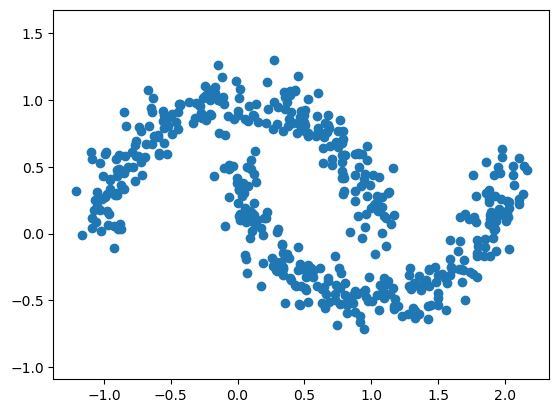

In [3]:
SEED = 2617
N = 500
SIG = 0.1
X, _ = make_moons(n_samples=N, noise=SIG, random_state=SEED)
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

We convert **X** from a numpy.array into a torch.tensor called **<font color='red'>XT</font>**, in order to train the autoencoders.

In [ ]:
XT = torch.tensor(X, dtype=torch.float32)

Note that our data is **2-dimensional**. Our goal then, is to find a good **1-dimensional** representation.<br>


#### Step 1:

1. Create a linear autoencoder named **<font color='red'>linenc</font>** to find the best linear 1-dimensional encoding.
2. Train this autoencoder (using **train_nn**), on the given data set (**XT**), using the following parameter values:
* **<font color='red'>learning_rate</font>** = $5\cdot 10^{-4}$
* **<font color='red'>max_iter</font>** = $1,000$
3. Use the trained network to compute the reconstruction of **XT** from its lower dimensionl encoding (i.e. compute Dec(Enc(XT))).<br>
Convert the result to **numpy.array** (using **detach().numpy()**) and store the result in **<font color='red'>X_LIN</font>**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Step 2:

1. Create a neural-network autoencoder named **<font color='red'>netenc</font>** to find the best linear 1-dimensional encoding.<br>
The intermediate layer sizes should be $d_1 = 10$ and $d_2 = 25$.<br>

2. Train this autoencoder (using **train_nn**), on the given data set (**XT**), using the following parameter values:
* **<font color='red'>learning_rate</font>** = $5\cdot 10^{-4}$
* **<font color='red'>max_iter</font>** = $10,000$

3. Use the trained network to compute the reconstruction of **XT** from its lower dimensionl encoding (i.e. compute Dec(Enc(XT))).<br>
Convert the result to **numpy.array** (using **detach().numpy()**) and store the result in **<font color='red'>X_NET</font>**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Finally, as a comparison to both methods, we will perform dimension reduction and reconstruction using PCA.<br>
No instructions here, just remember to center the data before PCA, and fix the mean after.<br>
Place the result in **<font color='red'>X_PCA</font>** (should also be **numpy.array**)

**<font color='red'>NOTE:</font>** The matrix **X** we defined above is $N\times D$, while for PCA we usually use $D\times N$ matrices.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

We plot the results of all three reconstructions (**<font color='blue'>blue points</font>** - original data, **<font color='orange'>orange points</font>**  - reconstruction).

**<font color='blue'>Q:</font>** How do these methods compare?

In [ ]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X_PCA[:,0], X_PCA[:,1])
plt.axis('equal');

plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X_LIN[:,0], X_LIN[:,1])
plt.axis('equal');

plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X_NET[:,0], X_NET[:,1])
plt.axis('equal');

Now that we have neural-network autoencoder trained (**netenc**), we would like to test it performance on **new** data.

We first generate a new dataset (from the same two-moons distribution).

In [ ]:
SEED = 9987
N = 100
X_new, L_new = make_moons(n_samples=N, noise=SIG, random_state=SEED)

Take the data points in **X_new** and apply to them the following:
1. The entire encoder-decoder pipeline (using **netenc**). <br>
Convert the result to **numpy.array**, and store it in **<font color='red'>XR_new</font>**.

1. Only the encoder part (using **netenc.encoder**). <br>
Convert the result to **numpy.array**, and store it in **<font color='red'>XE_new</font>**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

We plot the results.

**Left:** The new data points and their reconstruction.

**Right:** The lower dimensional (d=1) representation. We slighly shift the y-values so it will be easier to see all points. The points are colored here according to the cluster (moon) they belong to in the original sample.

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X_new[:,0],X_new[:,1])
plt.scatter(XR_new[:,0],XR_new[:,1])
plt.axis('equal');

plt.subplot(1,2,2)
plt.scatter(XE_new,2*L_new, c =L_new)
plt.axis('equal');

The last thing we want to do, is to generate new points by sampling the latent (encoded) space.<br>
Use **torch.linspace**, to generate **<font color='red'>1,000</font>** real values between **<font color='red'>-20</font>** and **<font color='red'>+20</font>**. Then use **<font color='red'>netenc.decoder</font>** to try to decode these values. <br> Place the result into **<font color='red'>XR_gen</font>**.

**<font color='red'>NOTE:</font>** The function **torch.linspace** will return 1D vector of length 1000. <br>In order to send it to the decoder, you first need to covert it into a 2D matrix (tensor) of dimension 1000x1.<br>
If **v** is a vector (tensor), a simple way to conver it to a matrix is by using:
**<font color='blue'>v[:, None]</font>**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Finally, we plot the result.

**<font color='blue'>Q:</font>** What can you make from the points plotted about the latent space?

In [ ]:
plt.scatter(XR_gen[:,0],XR_gen[:,1])
plt.axis('equal');